# Week 3 Regression

## Bài tập B.1

In [1]:
import math
import numpy as np

In [10]:
with open('fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [11]:
k = 6
def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value,ord=2, axis=1)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

data_len = len(x_data)

X_train = np.array(x_data[:40])
Y_train = np.array(y_data[:40])
X_test = np.array(x_data[40:data_len])
Y_test = np.array(y_data[40:data_len])

In [12]:
Y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(Y_pred[i], ' | ', Y_test[i])
SSE, MAE, R_2, TSS =0, 0, 0, 0
for i in range(len(Y_pred)):
    SSE = SSE + (Y_pred[i] - Y_test[i])**2
    MAE = MAE + abs(Y_pred[i] - Y_test[i])
    TSS = TSS + (Y_test[i] - np.mean(Y_test)) ** 2
R_2 = 1 - SSE/TSS
MAE = MAE/len(Y_pred)
print('MSE = ', SSE/len(Y_pred))
print('Mae = ', MAE)
print('R^2 = ', R_2)

655.9029512433245  |  [711.73305769]
638.4560580336707  |  [697.05277706]
638.4560580336706  |  [638.23106095]
611.9269910198954  |  [681.10013659]
655.9029512433245  |  [591.49994589]
644.4898294882122  |  [691.02271186]
588.0444680617263  |  [681.03112144]
605.0998495739349  |  [576.06974956]
662.653139627235  |  [562.4109333]
584.9524291587197  |  [581.79371695]
644.4898294882122  |  [842.79175243]
MSE =  [6956.3637859]
Mae =  [65.31640461]
R^2 =  [-0.13937317]


C:\Users\DELL\AppData\Local\Temp\ipykernel_2840\3964336594.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_pred[i] = Y_pred[i] + Y_train[id]


## Bài 1

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

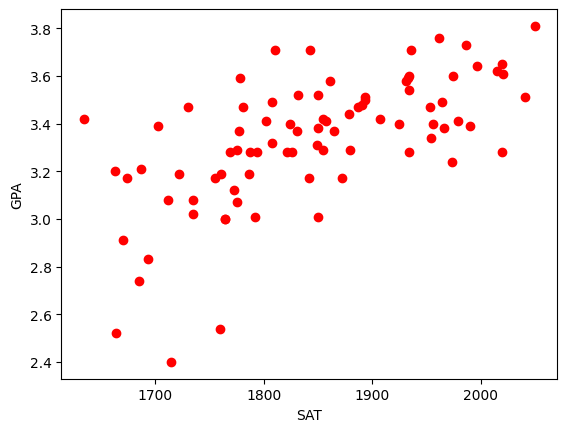

In [19]:
data = pd.read_csv("SAT_GPA.csv").sample(frac = 1, random_state=42).reset_index(drop=True)
X = data['SAT'].values.reshape(-1 ,1)
y = data['GPA'].values.reshape(-1 ,1)
plt.plot(X, y,'ro')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [20]:
X_train = X[:64]
y_train = y[:64]
X_test = X[64:]
y_test = y[64:]

w =  [[0.45742848]
 [0.00155809]]
1953		3.47		3.50
1775		3.29		3.22
1936		3.71		3.47
1891		3.48		3.40
2041		3.51		3.64
1975		3.60		3.53
1954		3.34		3.50
1794		3.28		3.25
1664		2.52		3.05
1907		3.42		3.43
1722		3.19		3.14
1760		2.54		3.20
1687		3.21		3.09
1843		3.71		3.33
2021		3.61		3.61
1761		3.19		3.20
1964		3.49		3.52
1778		3.59		3.23
1773		3.12		3.22
1855		3.42		3.35


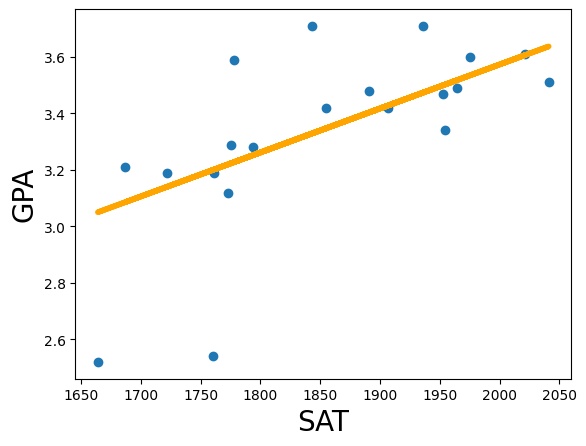

MSE = 0.0571
MAE = 0.1561
R² = 0.4311


In [32]:
one = np.ones((X_train.shape[0], 1))
Xbar = np.concatenate((one, X_train), axis = 1)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y_train)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
w_0 = w[0][0]
w_1 = w[1][0]
x0 = X_train

for i in range(len(X_test)):
    print(f"{X_test[i][0]:.0f}\t\t{y_test[i][0]:.2f}\t\t{y_pred[i][0]:.2f}")

plt.scatter(X_test, y_test)
y_pred = w_1 * X_test + w_0
fig = plt.plot(X_test, y_pred, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

MSE = np.mean((y_test - y_pred) ** 2)
MAE = np.mean(np.abs(y_test - y_pred))
R2 = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
print(f"MSE = {MSE:.4f}")
print(f"MAE = {MAE:.4f}")
print(f"R² = {R2:.4f}")

## Bài 2

In [1]:
import math
import numpy as np

In [2]:
with open('vidu4_lin_reg.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(' ')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    y_data.append(splitted[5])
    x_data.append(splitted[:5])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [3]:
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
    # vector to transform
        x = A[n:, n]
        k = x.shape[0]
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

In [4]:
def linear_regression(x_data, y_data):
    # """
    # This function calculate linear regression base on x_data and y_data
    # :param x_data: vector
    # :param y_data: vector
    # :return: w (regression estimate)
    # """

    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

In [5]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Age', 'BIM', 'BP','GLUCO','CHOLES']
res = list(zip(line, w))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: -0.10802908119386984
                 Age: 0.009946940947109888
                 BIM: -0.00020654770133402
                  BP: 0.00218136694524751
               GLUCO: 0.0076701016942299985
              CHOLES: 0.03847024823970336


In [8]:
x_train = x_data[:80]
y_train = y_data[:80]
x_test = x_data[80:]
y_test = y_data[80:]

[[ 56.    21.   160.    14.     6.  ]
 [ 76.    18.   150.    12.     4.97]
 [ 63.    16.   160.     4.4    6.39]
 [ 78.    20.   100.     4.     7.  ]
 [ 87.    20.   110.     4.6    4.1 ]
 [ 76.    19.   150.     4.6    2.74]
 [ 55.    31.   160.     5.5    4.6 ]
 [ 74.    22.   100.     6.8    5.04]
 [ 81.    21.   120.     5.8    4.75]
 [ 77.    24.   160.     5.4    6.94]
 [ 29.    20.   120.     3.8    4.84]
 [ 71.    22.   160.     3.3    6.63]
 [ 77.    21.   160.     5.1    4.93]
 [ 59.    18.   150.     6.     4.55]
 [ 58.    27.   130.     6.9    6.7 ]
 [ 34.    19.   130.     4.5    3.2 ]
 [ 74.    22.   100.    10.6    4.3 ]
 [ 61.    19.   170.    18.     6.8 ]
 [ 53.    20.   130.    25.     5.5 ]
 [ 65.    28.   140.     6.5    6.8 ]
 [ 80.    19.   160.     4.8    5.74]
 [ 71.    25.   160.     6.2    6.9 ]
 [ 90.    24.   160.     4.7    7.  ]
 [ 44.    24.   120.     6.     3.4 ]
 [ 91.    27.   150.     6.1    4.92]
 [ 75.    22.   160.     6.2    6.08]
 [ 60.    24

In [14]:

w = linear_regression(x_train, y_train)
print("Hệ số hồi quy (training):")
line = ['Intercept', 'TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']
for name, coef in zip(line, w.tolist()):
    print(f"{name:>20}: {coef:10.4f}")
y_pred = w[0] + w[1]*x_test[:,0] + w[2]*x_test[:,1] + w[3]*x_test[:,2] + w[4]*x_test[:,3] + w[5]*x_test[:,4]
print("\nSo sánh giá trị thực tế và dự đoán (tập test):")
print(f"{'STT':>3} | {'Thực tế (y_test)':>15} | {'Dự đoán (y_pred)':>17} | {'Sai số (error)':>15}")
print("-" * 60)
for i in range(len(y_test)):
    print(f"{i+1:3d} | {y_test[i]:15.4f} | {y_pred[i]:17.4f} | {(y_test[i] - y_pred[i]):15.4f}")

errors = y_test - y_pred

mean_error = np.mean(errors)
var_error = np.var(errors)

print("\nKết quả đánh giá trên tập test:")
print(f"Kỳ vọng của sai số (mean error) = {mean_error:.6f}")
print(f"Phương sai của sai số (variance) = {var_error:.6f}")

Hệ số hồi quy (training):
           Intercept:     0.0431
                TUOI:     0.0090
                 BMI:    -0.0005
                  HA:     0.0026
             GLUCOSE:     0.0081
         CHOLESTEROL:     0.0071

So sánh giá trị thực tế và dự đoán (tập test):
STT | Thực tế (y_test) |  Dự đoán (y_pred) |  Sai số (error)
------------------------------------------------------------
  1 |          0.8000 |            0.9101 |         -0.1101
  2 |          0.7000 |            0.7845 |         -0.0845
  3 |          1.0000 |            1.2234 |         -0.2234
  4 |          0.8000 |            0.9609 |         -0.1609
  5 |          0.8900 |            0.9684 |         -0.0784
  6 |          0.6000 |            1.0501 |         -0.4501
  7 |          1.5000 |            1.1969 |          0.3031
  8 |          0.7000 |            1.0522 |         -0.3522
  9 |          1.1000 |            0.9936 |          0.1064
 10 |          0.8100 |            0.6850 |          0.1250
 11 | 

## Bài 3

### Linear Regression

In [60]:
import math
import numpy as np

In [62]:
with open('real_estate.csv') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    y_data.append(splitted[6])
    x_data.append(splitted[:6])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

In [63]:
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
    # vector to transform
        x = A[n:, n]
        k = x.shape[0]
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

In [64]:
def linear_regression(x_data, y_data):
    # """
    # This function calculate linear regression base on x_data and y_data
    # :param x_data: vector
    # :param y_data: vector
    # :return: w (regression estimate)
    # """

    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

In [66]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Trans', 'Age', 'Distance','NumsStore','Latitude', 'Longitude']
res = list(zip(line, w))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: -14437.100802481495
               Trans: 5.146227462999235
                 Age: -0.2696954475802879
            Distance: -0.0044874610740296035
           NumsStore: 1.1332769046501041
            Latitude: 225.47297556363904
           Longitude: -12.423601172111605


In [70]:
x_train = x_data[:350]
y_train = y_data[:350]
x_test = x_data[350:]
y_test = y_data[350:]
w = linear_regression(x_train, y_train) # get result
w = w.T.tolist()
print("Hệ số hồi quy (training):")
line = ['Intercept', 'Trans', 'Age', 'Distance','NumsStore','Latitude', 'Longitude']
res = list(zip(line, w))
for o in res:
    print("{: >20}: {: >10}".format(*o))
y_pred = w[0] + w[1]*x_test[:,0] + w[2]*x_test[:,1] + w[3]*x_test[:,2] + w[4]*x_test[:,3] + w[5]*x_test[:,4] + w[6]*x_test[:,5]
print("\nSo sánh giá trị thực tế và dự đoán (tập test):")
print(f"{'STT':>3} | {'Thực tế (y_test)':>15} | {'Dự đoán (y_pred)':>17} | {'Sai số (error)':>15}")
print("-" * 60)
for i in range(len(y_test)):
    print(f"{i+1:3d} | {y_test[i]:15.4f} | {y_pred[i]:17.4f} | {(y_test[i] - y_pred[i]):15.4f}")

errors = y_test - y_pred

mean_error = np.mean(errors)
var_error = np.var(errors)

print("\nKết quả đánh giá trên tập test:")
print(f"Kỳ vọng của sai số (mean error) = {mean_error:.6f}")
print(f"Phương sai của sai số (variance) = {var_error:.6f}")

Hệ số hồi quy (training):
           Intercept: -16063.986195519152
               Trans: 5.408082458030019
                 Age: -0.2834607874352294
            Distance: -0.004162725549932784
           NumsStore: 1.1348178454624989
            Latitude: 256.1739816064608
           Longitude: -9.683200518478086

So sánh giá trị thực tế và dự đoán (tập test):
STT | Thực tế (y_test) |  Dự đoán (y_pred) |  Sai số (error)
------------------------------------------------------------
  1 |         42.3000 |           40.9183 |          1.3817
  2 |         28.6000 |           33.0790 |         -4.4790
  3 |         25.7000 |           26.5143 |         -0.8143
  4 |         31.3000 |           36.7265 |         -5.4265
  5 |         30.1000 |           31.8394 |         -1.7394
  6 |         60.7000 |           49.3446 |         11.3554
  7 |         45.3000 |           39.8489 |          5.4511
  8 |         44.9000 |           52.8929 |         -7.9929
  9 |         45.1000 |           

### K_NN

In [71]:
import math
import numpy as np

In [72]:
with open('real_estate.csv') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    y_data.append(splitted[6])
    x_data.append(splitted[:6])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [73]:
k = 18
def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value,ord=2, axis=1)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

X_train = np.array(x_data[:350])
Y_train = np.array(y_data[:350])
X_test = np.array(x_data[40:])
Y_test = np.array(y_data[40:])

In [76]:
Y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(Y_pred[i], ' | ', Y_test[i])
SSE, MAE, R_2, TSS =0, 0, 0, 0
for i in range(len(Y_pred)):
    SSE = SSE + (Y_pred[i] - Y_test[i])**2
    MAE = MAE + abs(Y_pred[i] - Y_test[i])
    TSS = TSS + (Y_test[i] - np.mean(Y_test)) ** 2
R_2 = 1 - SSE/TSS
MAE = MAE/len(Y_pred)
print('MSE = ', SSE/len(Y_pred))
print('Mae = ', MAE)
print('R^2 = ', R_2)

errors = Y_test - Y_pred

mean_error = np.mean(errors)
var_error = np.var(errors)

print("\nKết quả đánh giá trên tập test:")
print(f"Kỳ vọng của sai số (mean error) = {mean_error:.6f}")
print(f"Phương sai của sai số (variance) = {var_error:.6f}")

19.572222222222223  |  15.9
19.572222222222226  |  18.2
38.43333333333333  |  34.7
38.95  |  34.1
42.67222222222222  |  53.9
38.922222222222224  |  38.3
38.49444444444444  |  42.0
39.60555555555556  |  61.5
16.88888888888889  |  13.4
16.88888888888889  |  13.2
39.58888888888889  |  44.2
26.538888888888888  |  20.7
29.916666666666668  |  27.0
39.72777777777778  |  38.9
52.95  |  51.7
23.694444444444446  |  13.7
41.59444444444444  |  41.9
53.900000000000006  |  53.5
16.88888888888889  |  22.6
44.74444444444444  |  42.4
26.17222222222222  |  21.3
49.97222222222222  |  63.2
27.177777777777774  |  27.7
42.67222222222222  |  55.0
26.28888888888889  |  25.3
48.28888888888889  |  44.3
46.233333333333334  |  50.7
52.51666666666667  |  56.8
37.63333333333334  |  36.2
43.60555555555556  |  42.0
53.40555555555555  |  59.0
39.60555555555556  |  40.8
36.777777777777786  |  36.3
19.572222222222223  |  20.0
47.56666666666667  |  54.4
29.83888888888889  |  29.5
39.15555555555556  |  36.8
27.17777777777